# Resultados do Trabalho 2 de Inteligência Artificial

*   Autor: Fernando Azevedo Peres
*   Periodo: 2022/1

Comparação dos resultados obtidos pelo AI_Fernando com os resultados do AI_Flavio.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

columns = ['AI_Fernando', 'AI_Flavio']

prof = [1493.5, 1218.5, 506.25, 448.0, 1248.5, 1336.25, 945.5, 1314.0, 1011.25, 1408.25, 1625.25, 779.0, 1413.75, 984.75, 814.5, 788.5, 710.25, 1467.25, 1341.5, 1005.5, 776.5, 715.75, 737.25, 973.0, 1400.25, 720.0, 911.75, 879.0, 951.0, 882.5]
knn = [1403.25, 1218.0, 1468.0, 1518.5, 1260.0, 1351.75, 1266.25, 1313.75, 1156.5, 1403.25, 1528.25, 1485.75, 1239.0, 1002.75, 1401.5, 1389.25, 1287.0, 1496.0, 1138.75, 1215.0, 1346.75, 1495.25, 1342.75, 1368.0, 1111.5, 1400.75, 1407.5, 1494.0, 1377.25, 1287.75]

results = list()
results.append(knn)
results.append(prof)

### BoxPlot

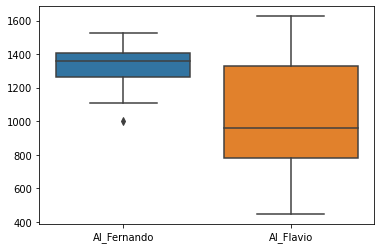

In [ ]:
df_scores = pd.DataFrame(data=np.transpose(results), columns=columns)

sns.boxplot( data=df_scores )
plt.show()

### Teste Estatístico

In [ ]:
from scipy.stats import ttest_rel, wilcoxon

p_values = [[0 for i in range(2)] for j in range(2)]

for i, value in enumerate(['AI_Fernando', 'AI_Flavio']):
  p_values[i][i] = value

for i in range(2):
  for j in range(2):
    if i != j:
      if j <= i:
        s, p = wilcoxon(results[i], results[j])
        p_values[i][j] = p
      else:
        s,p = ttest_rel(results[i], results[j])
        p_values[i][j] = p


df_p_values = pd.DataFrame(p_values)
df_p_values

,0,1
0,AI_Fernando,0.000066
1,0.000388,AI_Flavio


### 30 resultados

In [ ]:
results = []

results.append(sorted(knn, reverse=True))
results.append(sorted(prof, reverse=True))

df_results = pd.DataFrame(data=results, index=columns).T

df_results

,AI_Fernando,AI_Flavio
0,1528.25,1625.25
1,1518.50,1493.50
2,1496.00,1467.25
3,1495.25,1413.75
4,1494.00,1408.25
5,1485.75,1400.25
6,1468.00,1341.50
7,1407.50,1336.25
8,1403.25,1314.00
9,1403.25,1248.50


### Análise Geral

In [ ]:
np_knn = np.asarray(knn)

mean_kNN = np_knn.mean()
std_kNN = np_knn.std()
inf_kNN, sup_kNN = stats.norm.interval(0.95, loc=mean_kNN, scale=std_kNN/np.sqrt(len(np_knn)))

kNN_results = ['IA_Fernando', mean_kNN, std_kNN, inf_kNN, sup_kNN]

np_prof = np.asarray(prof)

mean_prof = np_prof.mean()
std_prof = np_prof.std()
inf_prof, sup_prof = stats.norm.interval(0.95, loc=mean_prof, scale=std_prof/np.sqrt(len(np_prof)))

prof_results = ['IA_Flavio', mean_prof, std_prof, inf_prof, sup_prof]

results = [kNN_results, prof_results]
columns = ['Agente', 'Média', 'Desvio Padrão', 'Limite Inferior', 'Limite Superior']

df_results = pd.DataFrame(data=results, columns=columns).round(2)

df_results

,Agente,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,IA_Fernando,1339.13,129.20,1292.90,1385.37
1,IA_Flavio,1026.91,308.13,916.65,1137.17
